In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import sys
from pathlib import Path
from glob import glob

noise_dim = 100

SCRIPT_PATH = Path('/content/drive/MyDrive/Colab Notebooks/CGAN_M')
EXPERIMENT_ID = 'EXP_1'
MODEL_SAVE_PATH = SCRIPT_PATH / EXPERIMENT_ID / 'cgan'

In [11]:
def generate_images(model):
    
    r, c = 2, 5
    noise = tf.random.normal([10, noise_dim])
    sampled_labels = np.arange(0, 10).reshape(-1, 1).astype(np.int32)
    gen_imgs = model([noise, sampled_labels], training=False)

    # Rescale images 0 - 1
    gen_imgs = 0.5 * gen_imgs + 0.5

    fig, axs = plt.subplots(r, c)
    cnt = 0
    for i in range(r):
        for j in range(c):
            axs[i,j].imshow(gen_imgs[cnt,:,:,0], cmap='gray')
            axs[i,j].set_title("Digit: {}".format(sampled_labels[cnt]))
            axs[i,j].axis('off')
            cnt += 1

    plt.tight_layout()
    plt.show()

In [3]:
generator = tf.saved_model.load(str(MODEL_SAVE_PATH))

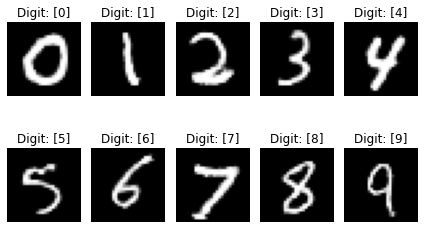

In [19]:
generate_images(generator)